# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [3]:
def F(n):
    for i in range(n):
        pad = '-' * (n - i - 1)
        letter = ""
        for j in range(2 * i + 1):
            letter += chr(65 + abs(j - i))
        line = pad + letter + pad
        print(line)


# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [6]:
def F(d : dict):
    print("Sorted by key values (ascending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[0]):  
        print(f"-{key}-, -{x}-, -{y}-")
    
    print("Sorted by x values (descending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: -item[1][0]):
        print(f"-{key}-, -{x}-, -{y}-")
    
    print("Sorted by y values (ascending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][1]):
        print(f"-{key}-, -{x}-, -{y}-")

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by key values (ascending):
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-
Sorted by x values (descending):
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-
Sorted by y values (ascending):
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
Sorted by key values (ascending):
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-
Sorted by x values (descending):
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-
Sorted by y values (ascending):
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


In [8]:
def read_csv(file_path):
    with open(file_path, "r") as f:
        header = f.readline().strip().split(",")
        rows = [dict(zip(header, line.strip().split(","))) for line in f]
    return rows

def grade_to_points(grade):
    grade_map = {"AP": 10, "AA": 10, "AB": 9, "BB": 8, "BC": 7, "CC": 6}
    return grade_map.get(grade, 0)

def print_first_10_rows(records):
    print("First 10 rows of the student records:")
    for row in records[:10]:
        print(row)

def calculate_total_credits_and_cpi(records):
    student_data = {}
    for record in records:
        roll = record["roll_number"]
        credit = int(record["credit"])
        course_type = record["course_type"]
        grade_points = grade_to_points(record["grade"])

        if roll not in student_data:
            student_data[roll] = {"total_credits": 0, "core_weighted_sum": 0, "core_credits": 0}

        student_data[roll]["total_credits"] += credit
        if course_type == "core":
            student_data[roll]["core_weighted_sum"] += credit * grade_points
            student_data[roll]["core_credits"] += credit

    for roll, data in student_data.items():
        if data["core_credits"] > 0:
            data["CPI"] = data["core_weighted_sum"] / data["core_credits"]
        else:
            data["CPI"] = 0

    for roll, data in student_data.items():
        print(f"Roll Number: {roll}, Total Credits: {data['total_credits']}, CPI: {data['CPI']:.2f}")

def find_graduating_students(records):
    graduation_requirements = {
        "core": 20,
        "department_elective": 15,
        "flexible_elective": 10,
        "hasmed_elective": 5,
    }

    student_credits = {}
    for record in records:
        roll = record["roll_number"]
        credit = int(record["credit"])
        course_type = record["course_type"]

        if roll not in student_credits:
            student_credits[roll] = {ctype: 0 for ctype in graduation_requirements}

        if course_type in graduation_requirements:
            student_credits[roll][course_type] += credit

    graduating_students = []
    for roll, credits in student_credits.items():
        if all(credits[ctype] >= req for ctype, req in graduation_requirements.items()):
            graduating_students.append(roll)

    print("Graduating Students:")
    for roll in graduating_students:
        print(roll)

def find_minor_students(records):
    minor_threshold = 10
    minor_credits = {}

    for record in records:
        roll = record["roll_number"]
        credit = int(record["credit"])
        course_type = record["course_type"]
        department = record["course_name"][:2]

        if course_type == "minor":
            if roll not in minor_credits:
                minor_credits[roll] = {}
            if department not in minor_credits[roll]:
                minor_credits[roll][department] = 0

            minor_credits[roll][department] += credit

    minor_students = []
    for roll, departments in minor_credits.items():
        if any(credits >= minor_threshold for credits in departments.values()):
            minor_students.append(roll)

    print("Students completing a minor:")
    for roll in minor_students:
        print(roll)

def find_honours_students(records):
    honours_credits = 10
    core_credits = 20
    student_credits = {}

    for record in records:
        roll = record["roll_number"]
        credit = int(record["credit"])
        course_type = record["course_type"]

        if roll not in student_credits:
            student_credits[roll] = {"honours": 0, "core": 0}

        if course_type == "honours":
            student_credits[roll]["honours"] += credit
        if course_type == "core":
            student_credits[roll]["core"] += credit

    honours_students = [
        roll for roll, credits in student_credits.items()
        if credits["honours"] >= honours_credits and credits["core"] >= core_credits
    ]

    print("Students completing honours:")
    for roll in honours_students:
        print(roll)

file_path = "student_records.csv"
records = read_csv(file_path)

#### 2.a: open the student_records.csv file and print out the first 10 rows

In [9]:
print_first_10_rows(records)

First 10 rows of the student records:
{'roll_number': '588946', 'department': 'MA', 'credit': '3', 'course_name': 'EC250', 'course_type': 'hasmed_elective', 'grade': 'AB'}
{'roll_number': '145372', 'department': 'EP', 'credit': '4', 'course_name': 'EP407', 'course_type': 'hasmed_elective', 'grade': 'CC'}
{'roll_number': '834515', 'department': 'MA', 'credit': '8', 'course_name': 'EP885', 'course_type': 'hasmed_elective', 'grade': 'BB'}
{'roll_number': '344265', 'department': 'CSE', 'credit': '6', 'course_name': 'CSE699', 'course_type': 'honours', 'grade': 'AB'}
{'roll_number': '358405', 'department': 'MA', 'credit': '3', 'course_name': 'EE460', 'course_type': 'minor', 'grade': 'AP'}
{'roll_number': '781075', 'department': 'CE', 'credit': '8', 'course_name': 'CE540', 'course_type': 'honours', 'grade': 'CC'}
{'roll_number': '180828', 'department': 'CSE', 'credit': '6', 'course_name': 'CE880', 'course_type': 'minor', 'grade': 'AB'}
{'roll_number': '981238', 'department': 'MM', 'credit': '

#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [10]:
calculate_total_credits_and_cpi(records)

Roll Number: 588946, Total Credits: 199, CPI: 8.38
Roll Number: 145372, Total Credits: 173, CPI: 8.60
Roll Number: 834515, Total Credits: 199, CPI: 8.20
Roll Number: 344265, Total Credits: 153, CPI: 6.73
Roll Number: 358405, Total Credits: 206, CPI: 8.87
Roll Number: 781075, Total Credits: 246, CPI: 8.67
Roll Number: 180828, Total Credits: 177, CPI: 8.07
Roll Number: 981238, Total Credits: 168, CPI: 8.56
Roll Number: 836881, Total Credits: 246, CPI: 7.83
Roll Number: 310604, Total Credits: 198, CPI: 8.31
Roll Number: 847809, Total Credits: 261, CPI: 7.27
Roll Number: 773982, Total Credits: 264, CPI: 8.25
Roll Number: 500658, Total Credits: 208, CPI: 8.59
Roll Number: 810863, Total Credits: 192, CPI: 8.09
Roll Number: 124663, Total Credits: 229, CPI: 8.26
Roll Number: 364146, Total Credits: 225, CPI: 8.86
Roll Number: 871746, Total Credits: 216, CPI: 8.06
Roll Number: 270007, Total Credits: 241, CPI: 7.18
Roll Number: 597353, Total Credits: 200, CPI: 6.80
Roll Number: 986057, Total Cred

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [11]:
find_graduating_students(records)

Graduating Students:
588946
834515
781075
180828
981238
836881
310604
773982
500658
810863
124663
871746
986057
379479
144528
485484
845623
150503
214270
517837
482623
721490
955757
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
970791
143142
998293
681499
888886
608522
362471
692318
626000
581065
787967
381227
750259
881983
294697


#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [12]:
find_minor_students(records)

Students completing a minor:
358405
847809
781075
124663
364146
721490
571782
716985
482623
329535
810863
973158
143142
907454
888886
608952
143856
773982
960395
283796
461584
597353
845623
465496
718510
836881
344265
581858
138296
381526
681499
816041
971123
199713
630568
379479
703403
388969
836431
381227
478606
159438
733782
782129
144528
851029
628849
995208
613401
301135
788020
955757
572815
521087
214270
461971
145372
588946
581065
993835


#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [13]:
find_honours_students(records)

Students completing honours:
588946
145372
834515
781075
836881
310604
773982
500658
810863
124663
364146
871746
986057
718510
379479
582912
788020
613401
144528
485484
199713
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
870642
970791
143142
998293
681499
888886
608522
362471
465496
208100
692318
626000
458200
581065
787967
750259
881983
294697


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [14]:
from scipy.optimize import minimize

def objective(vars):
    x, y = vars
    return 2 * ((x - y - 3)**2) + 4 * ((x + 2*y + 1)**2)

def constraint1(vars):
    x, y = vars
    return x - y + 3  

def constraint2(vars):
    x, y = vars
    return 5 - ((x + 2)**2 + (y + 1)**2)

x0 = [0, 0] 

constraints = [
    {"type": "ineq", "fun": constraint1},  
    {"type": "ineq", "fun": constraint2},  
]

result = minimize(objective, x0, constraints=constraints)

print("Optimal values of x and y:", result.x)
print("Minimum value of the function:", result.fun)
print("Success:", result.success)
print("Message:", result.message)


Optimal values of x and y: [ 0.23249592 -0.87365923]
Minimum value of the function: 8.233465682358581
Success: True
Message: Optimization terminated successfully


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [15]:
import numpy as np
from scipy.integrate import quad

def integrand(t):
    x = np.sqrt(3) * np.cos(t)
    y = np.sqrt(3) * np.sin(t)
    f_xy = x**2 + y**4
    return f_xy * np.sqrt(3)

result, error = quad(integrand, 0, 2 * np.pi)

print("Value of the line integral:", result)
print("Estimated error:", error)


Value of the line integral: 53.05363140385085
Estimated error: 5.3768447472180014e-09


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [16]:
import time  # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [17]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt(data_path, delimiter=',')
    return data

In [18]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        centers = data[np.random.choice(data.shape[0], K, replace=False)]
    else:
        centers = init_centers
    return centers

In [19]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    labels = np.zeros(data.shape[0], dtype=int)
    return labels

In [20]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centers[np.newaxis, :, :], axis=2)
    return distances

In [21]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels

In [22]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = np.array([data[labels == k].mean(axis=0) if np.any(labels == k) else np.zeros(2) for k in range(K)])
    return centers

In [23]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [24]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [25]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')
    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')
    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')
    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.004056215286254883


<module 'matplotlib.pyplot' from 'C:\\Users\\ariji\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

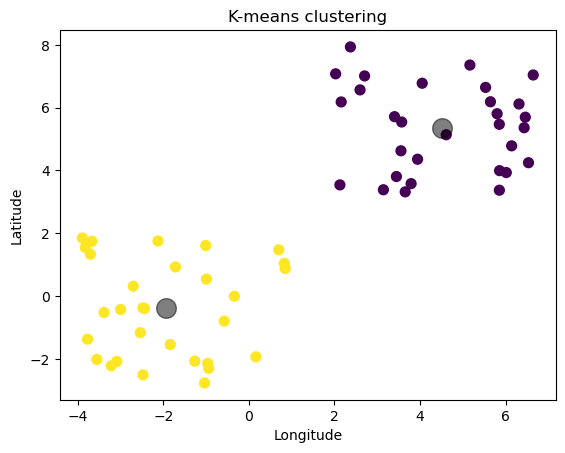

In [26]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)

Time taken for the algorithm to converge: 0.0


<module 'matplotlib.pyplot' from 'C:\\Users\\ariji\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

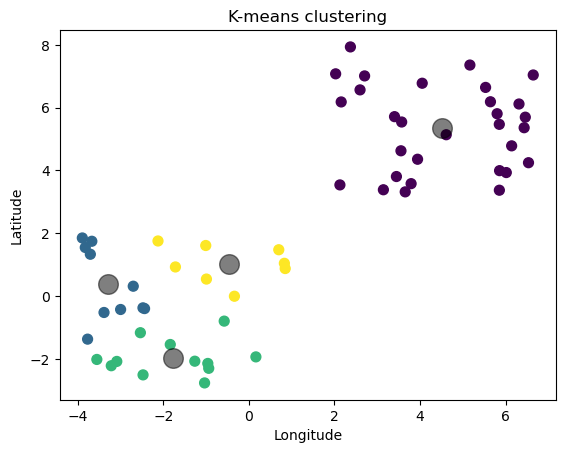

In [27]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 4, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)